In [1]:
import io
import sys
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
import time
import random
from tqdm import tqdm
from sys import getsizeof
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# set files path
sales1 = 'ae_com.csv'
sales2 = 'amazon_com.csv'
sales3 = 'btemptd_com.csv'
sales4 = 'calvinklein_com.csv'
sales5 = 'hankypanky_com.csv'
sales6 = 'macys_com.csv'
sales7 = 'shop_nordstrom_com.csv'
sales8 = 'us_topshop_com.csv'
sales9 = 'victoriassecret_com.csv'


print("*** Merging multiple csv files into a single pandas dataframe ***")

# merge files
df = pd.concat(
   map(pd.read_csv, [sales1, sales2, sales3, sales4, sales5, sales6, sales7, sales8, sales9]), ignore_index=True)
print(df)

*** Merging multiple csv files into a single pandas dataframe ***
                            product_name        mrp      price  \
0       Aerie Everyday Loves Lace Cheeky  12.50 USD  12.50 USD   
1       Aerie Everyday Loves Lace Cheeky  12.50 USD  12.50 USD   
2       Aerie Everyday Loves Lace Cheeky  12.50 USD  12.50 USD   
3       Aerie Everyday Loves Lace Cheeky  12.50 USD  12.50 USD   
4       Aerie Everyday Loves Lace Cheeky  12.50 USD  12.50 USD   
...                                  ...        ...        ...   
613138  Dream Angels NEW! Lace Mini Slip    $48.00     $48.00    
613139  Dream Angels NEW! Lace Mini Slip    $48.00     $48.00    
613140  Dream Angels NEW! Lace Mini Slip    $48.00     $48.00    
613141  Dream Angels NEW! Lace Mini Slip    $48.00     $48.00    
613142  Dream Angels NEW! Lace Mini Slip    $48.00     $48.00    

                                                  pdp_url         brand_name  \
0       https://www.ae.com/aerie-everyday-loves-lace-c...    

In [6]:
df.head()

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Rugged Green
1,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Natural Nude
2,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",True Black
3,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",White
4,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Royal Navy


In [9]:
df.columns

Index(['product_name', 'mrp', 'price', 'pdp_url', 'brand_name',
       'product_category', 'retailer', 'description', 'rating', 'review_count',
       'style_attributes', 'total_sizes', 'available_size', 'color'],
      dtype='object')

In [11]:
df.dtypes

product_name         object
mrp                  object
price                object
pdp_url              object
brand_name           object
product_category     object
retailer             object
description          object
rating              float64
review_count        float64
style_attributes     object
total_sizes          object
available_size       object
color                object
dtype: object

In [13]:
df.isnull().sum()

product_name             0
mrp                      0
price                    0
pdp_url                  0
brand_name               0
product_category         0
retailer                 0
description              0
rating              379587
review_count        391113
style_attributes    456468
total_sizes              0
available_size           0
color                  677
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613143 entries, 0 to 613142
Data columns (total 14 columns):
product_name        613143 non-null object
mrp                 613143 non-null object
price               613143 non-null object
pdp_url             613143 non-null object
brand_name          613143 non-null object
product_category    613143 non-null object
retailer            613143 non-null object
description         613143 non-null object
rating              233556 non-null float64
review_count        222030 non-null float64
style_attributes    156675 non-null object
total_sizes         613143 non-null object
available_size      613143 non-null object
color               612466 non-null object
dtypes: float64(2), object(12)
memory usage: 65.5+ MB


In [14]:
bow = CountVectorizer(ngram_range=(1, 1))
features = bow.fit_transform(df)
features.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [18]:
df.describe()

,rating,review_count
count,233556.000000,2.220300e+05
mean,4.254360,5.708913e+35
std,0.527576,9.170288e+36
min,0.000000,1.000000e+00
25%,4.000000,1.600000e+01
50%,4.300000,9.700000e+01
75%,4.500000,3.860000e+02
max,5.000000,1.560000e+38


In [54]:
df['brand_name'].value_counts().head(10)

Victoria's Secret         342533
Victoria's Secret Pink    110853
HankyPanky                 35005
Wacoal                     28978
AERIE                      28304
Calvin Klein               18892
Hanky Panky                 8133
Calvin-Klein                7372
WACOAL                      6580
b.tempt'd by Wacoal         5241
Name: brand_name, dtype: int64

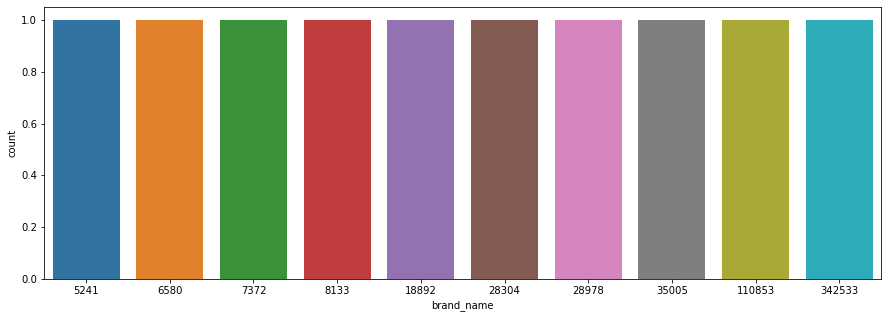

In [59]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(df['brand_name'].value_counts().head(10))
plt.show()

___Colores mas usados en la ropa interior por las diferentes marcas___

In [46]:
cc = df['color'].value_counts().head(10)
print(cc)

Black              36959
White              18094
black              13134
pure black          7101
Ensign              6738
Almost Nude         6271
bayberry            5441
Hello Lovely        5159
Sheer Pink          4985
Radiating Aztec     4862
Name: color, dtype: int64


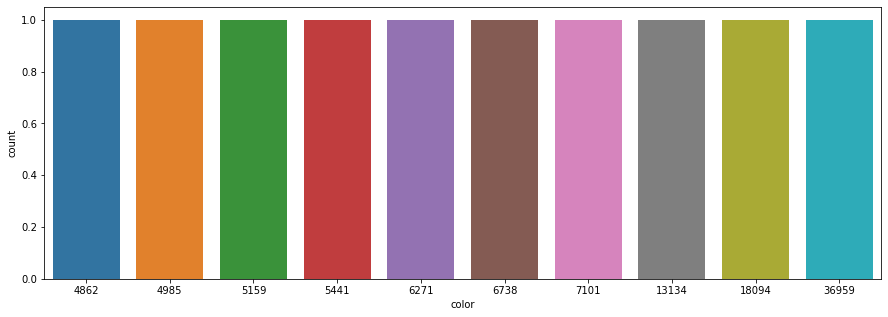

In [67]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(cc)
plt.show()

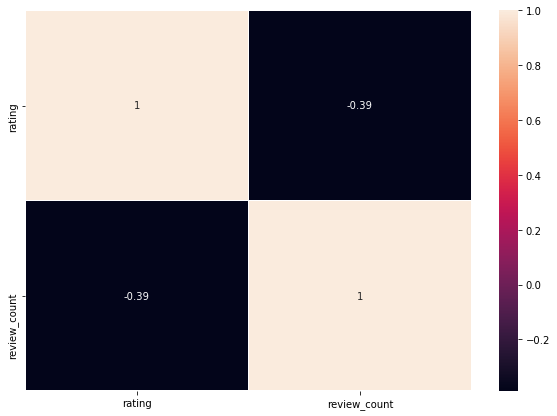

In [62]:
f, ax = plt.subplots(figsize=(10, 7))
mc=df.corr()
sns.heatmap(mc,annot=True,linewidths=.5, ax=ax)

In [ ]:
df['price'] = df['price'].replace({"$":''}, regex=True)
df